In [ ]:
pip install pandas

In [ ]:
# Panggil library yang akan digunakan
import pandas as pd
from pandas.plotting import scatter_matrix
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

In [ ]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
data = pd.read_csv('D:/My Project/Data Mining/campus_recruitment') #Importing the data
data.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,NaN,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


# Data Understanding

In [ ]:
data = pd.DataFrame(data)
print (data.shape)

(215, 15)


In [ ]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           212 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           213 non-null    object 
 6   hsc_s           213 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        214 non-null    object 
 9   workex          213 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB
None
(215, 15)


In [ ]:
print(data.dtypes)

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object


In [ ]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
# cek atribut yang memiliki missing value
print (data.isnull().sum())
print (data.shape)

sl_no              0
gender             0
ssc_p              0
ssc_b              3
hsc_p              0
hsc_b              2
hsc_s              2
degree_p           0
degree_t           1
workex             2
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64
(215, 15)


## Penanganan Missing Value

In [ ]:
# menghapus satu baris data(instance) yang memiliki missing value.
data.dropna(subset=['ssc_b','hsc_b','hsc_s','degree_t','workex'], inplace=True)

In [ ]:
# Penanganan missing value
# Mengisi nilai dengan 0
data['salary'].fillna(value=0, inplace=True)

In [ ]:
# cek atribut yang memiliki missing value
print (data.isnull().sum())
print (data.shape)

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64
(205, 15)


In [ ]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed,0.0


## Menghapus data yang tidak diperlukan

In [ ]:
data.drop(['sl_no','ssc_b','hsc_b'], axis = 1,inplace=True)
data.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
5,M,55.00,49.80,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed,0.0


# Data Outlier

<ipython-input-37-396bbf5fa287>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'Persentase nilai di SMA/SMK')

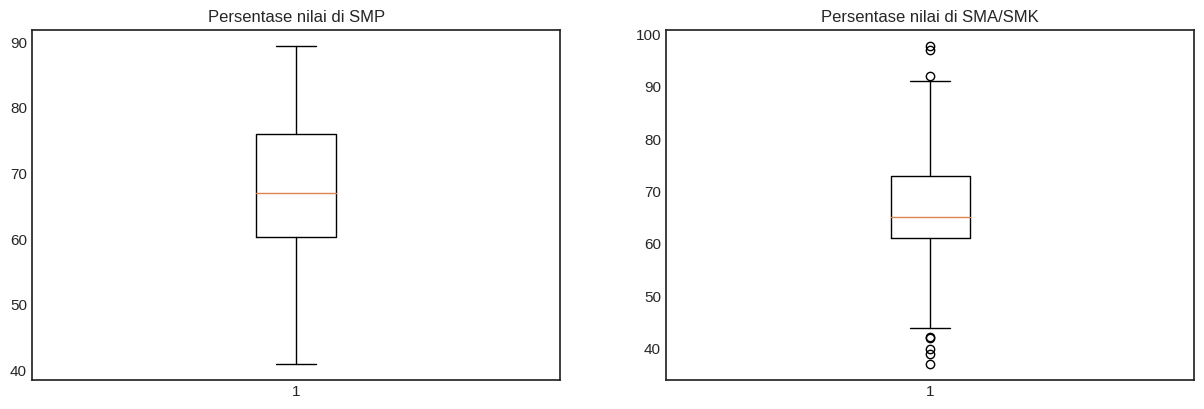

In [ ]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(data['ssc_p'])
ax.set_title('Persentase nilai di SMP')
ax=plt.subplot(222)
plt.boxplot(data['hsc_p'])
ax.set_title('Persentase nilai di SMA/SMK')

In [ ]:
# Penanganan Outlier
Q1 = data['hsc_p'].quantile(0.25)
Q3 = data['hsc_p'].quantile(0.75)
IQR = Q3 - Q1
filter = (data['hsc_p'] >= Q1 - 1.5 * IQR) & (data['hsc_p'] <= Q3 + 1.5 *IQR)
data_filtered=data.loc[filter]

<ipython-input-43-d0ee583fa54d>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


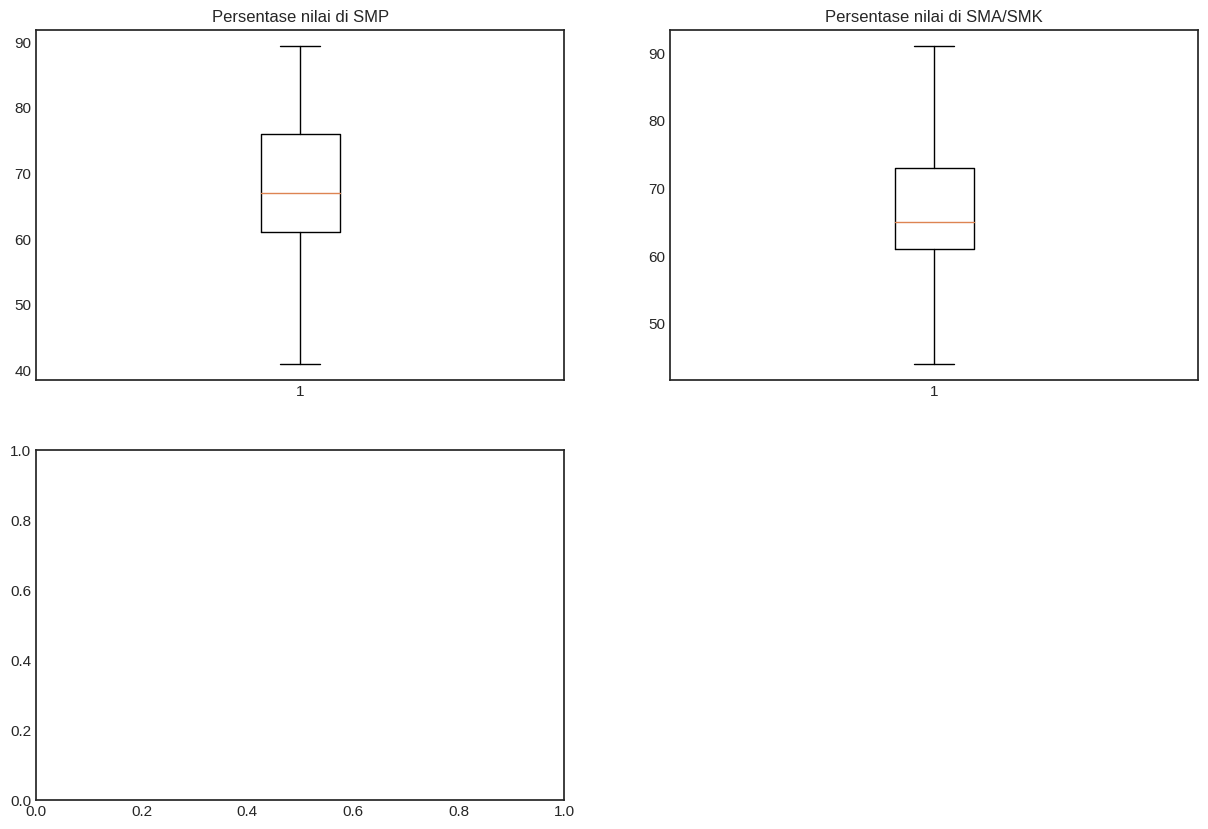

In [ ]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(data_filtered['ssc_p'])
ax.set_title('Persentase nilai di SMP')
ax=plt.subplot(222)
plt.boxplot(data_filtered['hsc_p'])
ax.set_title('Persentase nilai di SMA/SMK')
ax=plt.subplot(223)

# Data Visualizations

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

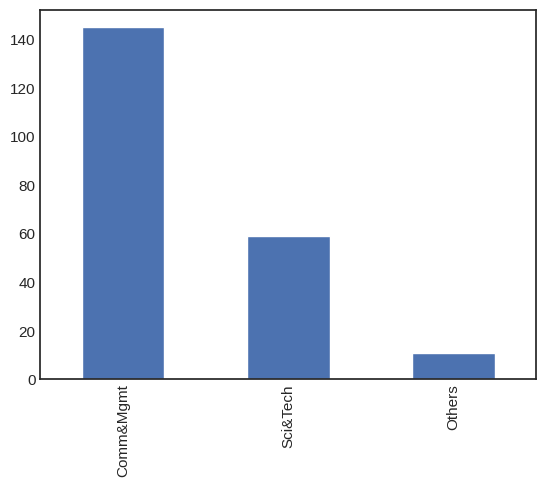

In [ ]:
data['degree_t'].value_counts().plot(kind='bar')
data['degree_t'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

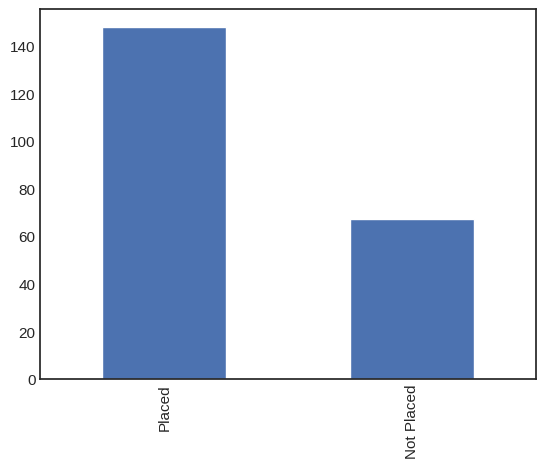

In [ ]:
data['status'].value_counts().plot(kind='bar')
data['status'].value_counts()

M    139
F     76
Name: gender, dtype: int64

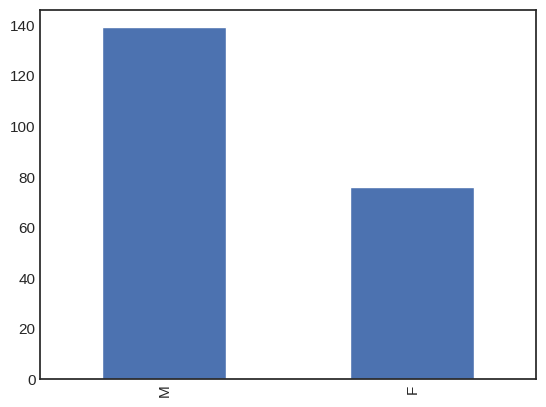

In [ ]:
data['gender'].value_counts().plot(kind='bar')
data['gender'].value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

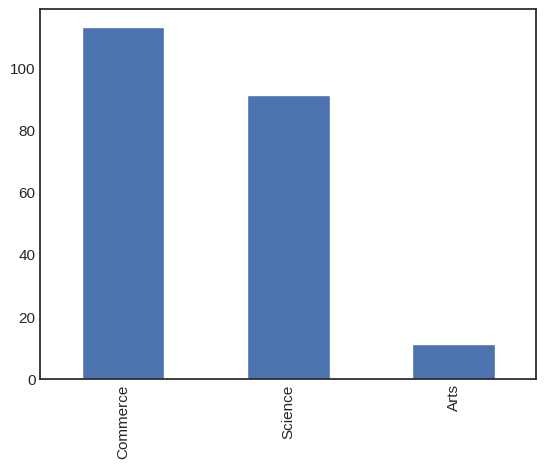

In [ ]:
data['hsc_s'].value_counts().plot(kind='bar')
data['hsc_s'].value_counts()

No     141
Yes     74
Name: workex, dtype: int64

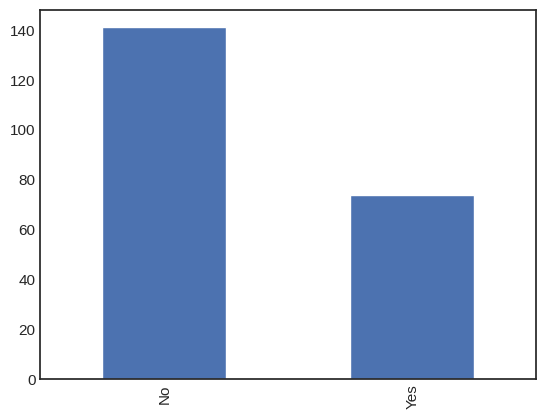

In [ ]:
data['workex'].value_counts().plot(kind='bar')
data['workex'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

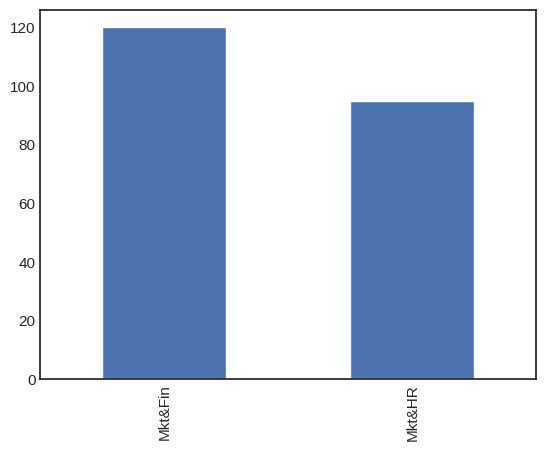

In [ ]:
data['specialisation'].value_counts().plot(kind='bar')
data['specialisation'].value_counts()

## Visualisasi hubungan antar atribut

,M,F
Commerce,0.339535,0.186047
Science,0.283721,0.139535
Arts,0.023256,0.027907


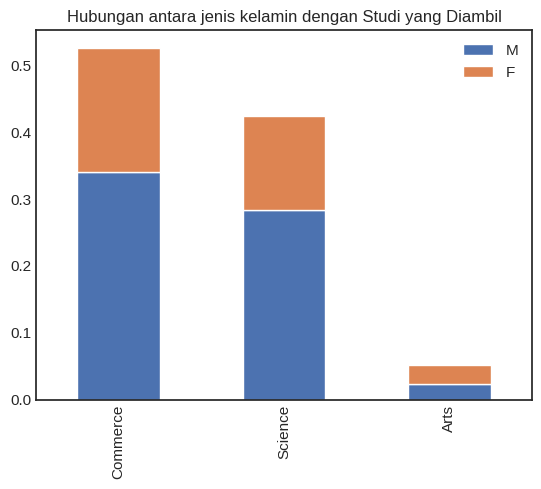

In [ ]:
def recruit_bar(variable):
  commerce=data[data['hsc_s']=='Commerce'][variable].value_counts()/len(data['hsc_s']=='Commerce')
  science=data[data['hsc_s']=='Science'][variable].value_counts()/len(data['hsc_s']=='Science')
  arts=data[data['hsc_s']=='Arts'][variable].value_counts()/len(data['hsc_s']=='Arts')
  dataset=pd.DataFrame([commerce,science,arts])
  dataset.index=['Commerce','Science', 'Arts']
  dataset.plot(kind='bar',stacked=True,title='Hubungan antara jenis kelamin dengan Studi yang Diambil')
  return dataset.head()

recruit_bar('gender')

,Comm&Mgmt,Sci&Tech,Others
Diterima,0.474419,0.190698,0.023256
Ditolak,0.200000,0.083721,0.027907


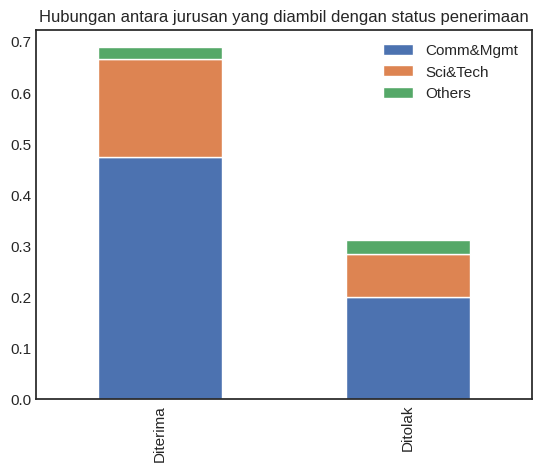

In [ ]:
def recruit_bar(variable):
  placed=data[data['status']=='Placed'][variable].value_counts()/len(data['status']=='Placed')
  not_placed=data[data['status']=='Not Placed'][variable].value_counts()/len(data['status']=='Not Placed')
  dataset=pd.DataFrame([placed,not_placed])
  dataset.index=['Diterima','Ditolak']
  dataset.plot(kind='bar',stacked=True,title='Hubungan antara jurusan yang diambil dengan status penerimaan')
  return dataset.head()

recruit_bar('degree_t')

,No,Yes
Diterima,0.390698,0.297674
Ditolak,0.265116,0.046512


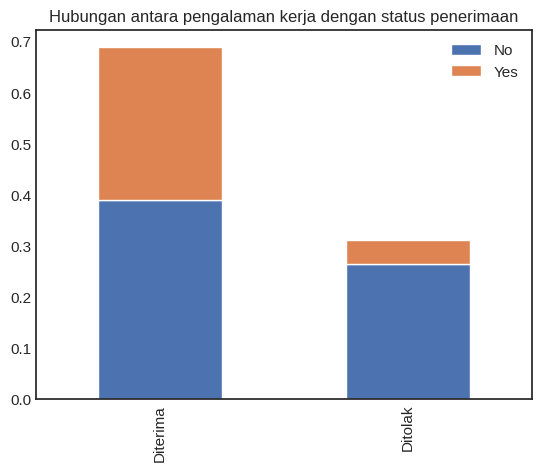

In [ ]:
def recruit_bar(variable):
  placed=data[data['status']=='Placed'][variable].value_counts()/len(data['status']=='Placed')
  not_placed=data[data['status']=='Not Placed'][variable].value_counts()/len(data['status']=='Not Placed')
  dataset=pd.DataFrame([placed,not_placed])
  dataset.index=['Diterima','Ditolak']
  dataset.plot(kind='bar',stacked=True,title='Hubungan antara pengalaman kerja dengan status penerimaan')
  return dataset.head()

recruit_bar('workex')

,M,F
Berpengalaman,0.24878,0.097561
Belum berpengalaman,0.40000,0.253659


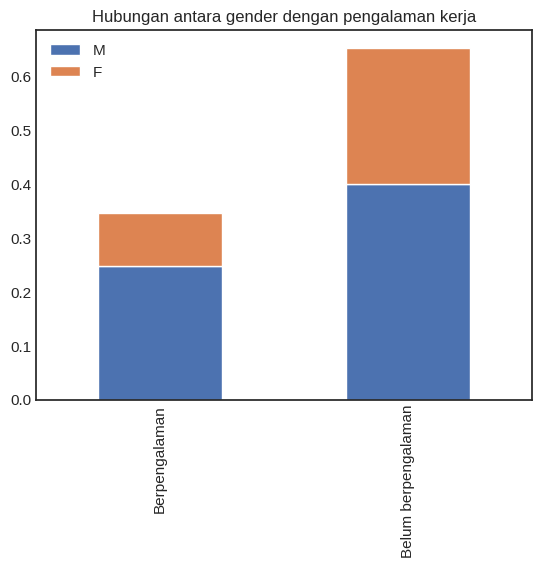

In [ ]:
def recruit_bar(variable):
  yes=data[data['workex']=='Yes'][variable].value_counts()/len(data['workex']=='Yes')
  no=data[data['workex']=='No'][variable].value_counts()/len(data['workex']=='No')
  dataset=pd.DataFrame([yes,no])
  dataset.index=['Berpengalaman','Belum berpengalaman']
  dataset.plot(kind='bar',stacked=True,title='Hubungan antara gender dengan pengalaman kerja')
  return dataset.head()

recruit_bar('gender')

,M,F
Diterima,0.465116,0.223256
Ditolak,0.181395,0.130233


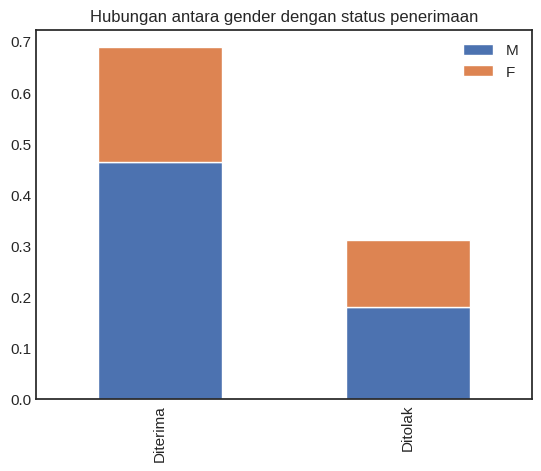

In [ ]:
def recruit_bar(variable):
  placed=data[data['status']=='Placed'][variable].value_counts()/len(data['status']=='Placed')
  not_placed=data[data['status']=='Not Placed'][variable].value_counts()/len(data['status']=='Not Placed')
  dataset=pd.DataFrame([placed,not_placed])
  dataset.index=['Diterima','Ditolak']
  dataset.plot(kind='bar',stacked=True,title='Hubungan antara gender dengan status penerimaan')
  return dataset.head()

recruit_bar('gender')

,Mkt&Fin,Mkt&HR
Diterima,0.441860,0.246512
Ditolak,0.116279,0.195349


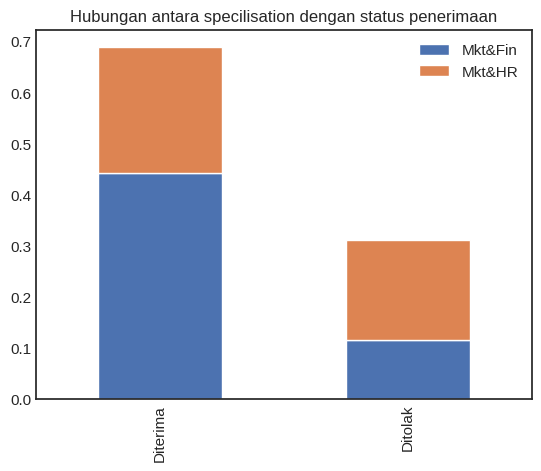

In [ ]:
def recruit_bar(variable):
  placed=data[data['status']=='Placed'][variable].value_counts()/len(data['status']=='Placed')
  not_placed=data[data['status']=='Not Placed'][variable].value_counts()/len(data['status']=='Not Placed')
  dataset=pd.DataFrame([placed,not_placed])
  dataset.index=['Diterima','Ditolak']
  dataset.plot(kind='bar',stacked=True,title='Hubungan antara specilisation dengan status penerimaan')
  return dataset.head()

recruit_bar('specialisation')

,No,Yes
Commerce,0.358140,0.167442
Science,0.269767,0.153488
Arts,0.027907,0.023256


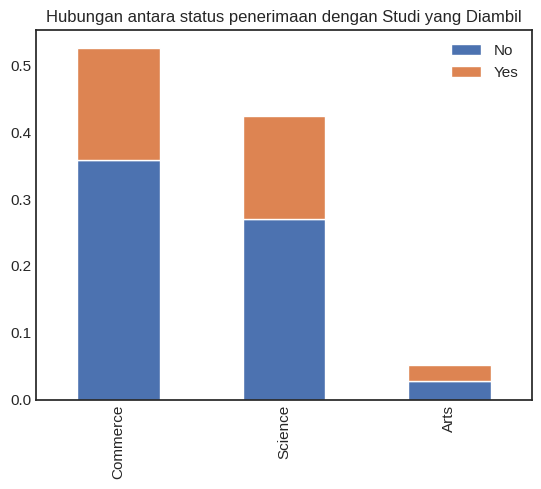

In [ ]:
def recruit_bar(variable):
  commerce=data[data['hsc_s']=='Commerce'][variable].value_counts()/len(data['hsc_s']=='Commerce')
  science=data[data['hsc_s']=='Science'][variable].value_counts()/len(data['hsc_s']=='Science')
  arts=data[data['hsc_s']=='Arts'][variable].value_counts()/len(data['hsc_s']=='Arts')
  dataset=pd.DataFrame([commerce,science,arts])
  dataset.index=['Commerce','Science', 'Arts']
  dataset.plot(kind='bar',stacked=True,title='Hubungan antara status penerimaan dengan Studi yang Diambil')
  return dataset.head()

recruit_bar('workex')

# Data Preprocessing

In [ ]:
data.head(10)

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,M,55.00,49.80,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,0.0
6,F,46.00,49.20,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,0.0
7,M,82.00,64.00,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,M,73.00,79.00,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,M,58.00,70.00,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,0.0


In [ ]:
# Mapping Gender
gender_map={
    "M":1,
    "F":0
    }
data["gender"]=data["gender"].map(gender_map)

data.head(10)

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,1,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,1,56.00,52.00,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,0.0
5,1,55.00,49.80,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,0.0
6,0,46.00,49.20,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,0.0
7,1,82.00,64.00,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,1,73.00,79.00,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,1,58.00,70.00,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,0.0
10,1,58.00,61.00,Commerce,60.00,Comm&Mgmt,Yes,62.00,Mkt&HR,60.85,Placed,260000.0


### Label Encoding

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le_obj=['workex','specialisation','status', 'hsc_s', 'degree_t']

label_encoder = LabelEncoder()
for col in le_obj:
    data[col] = label_encoder.fit_transform(data[col])

data.head(10)

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,1,58.00,2,0,55.00,1,58.80,1,270000.0
1,1,79.33,78.33,2,77.48,2,1,86.50,0,66.28,1,200000.0
2,1,65.00,68.00,0,64.00,0,0,75.00,0,57.80,1,250000.0
3,1,56.00,52.00,2,52.00,2,0,66.00,1,59.43,0,0.0
5,1,55.00,49.80,2,67.25,2,1,55.00,0,51.58,0,0.0
6,0,46.00,49.20,1,79.00,0,0,74.28,0,53.29,0,0.0
7,1,82.00,64.00,2,66.00,2,1,67.00,0,62.14,1,252000.0
8,1,73.00,79.00,1,72.00,0,0,91.34,0,61.29,1,231000.0
9,1,58.00,70.00,1,61.00,0,0,54.00,0,52.21,0,0.0
10,1,58.00,61.00,1,60.00,0,1,62.00,1,60.85,1,260000.0


### One Hot Encoding

In [ ]:
# # One Hot Encoding

# data = pd.get_dummies(data, columns=['hsc_s', 'degree_t'], prefix=['hsc_s', 'degree_t'])
# data.drop(['salary'],axis=1, inplace=True)
# data.head(10)

## Data Corellation

In [ ]:
import seaborn as sns

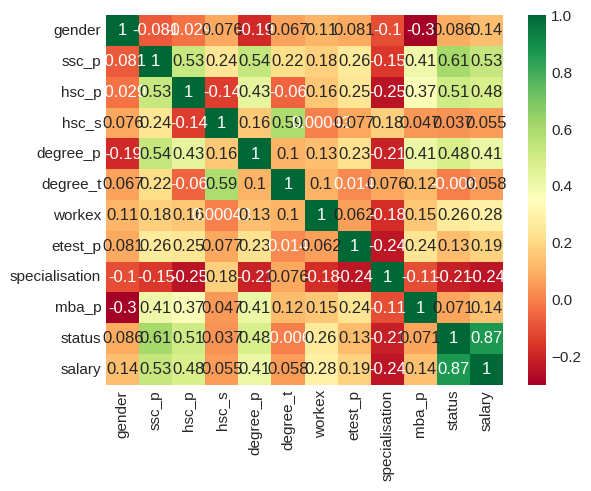

In [ ]:
# Fungsi untuk hitung korelasi
def recruit_corr(data):
  correlation = data.corr()
  sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")
recruit_corr(data)

In [ ]:
data.corr()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
gender,1.000000,-0.081070,-0.029359,0.076162,-0.186492,0.067360,0.106025,0.081104,-0.103642,-0.301072,0.085786,0.135947
ssc_p,-0.081070,1.000000,0.526833,0.244160,0.535106,0.222262,0.181675,0.260892,-0.150123,0.409152,0.607281,0.530106
hsc_p,-0.029359,0.526833,1.000000,-0.140691,0.431517,-0.059632,0.155278,0.245356,-0.247375,0.365949,0.505999,0.480833
hsc_s,0.076162,0.244160,-0.140691,1.000000,0.157295,0.588598,0.000429,0.077007,0.180469,0.047495,0.037186,0.054896
degree_p,-0.186492,0.535106,0.431517,0.157295,1.000000,0.102387,0.131482,0.231170,-0.207334,0.413117,0.478398,0.411361
degree_t,0.067360,0.222262,-0.059632,0.588598,0.102387,1.000000,0.101059,0.014455,0.075729,0.123498,-0.006045,0.057586
workex,0.106025,0.181675,0.155278,0.000429,0.131482,0.101059,1.000000,0.062402,-0.175748,0.153296,0.262638,0.284461
etest_p,0.081104,0.260892,0.245356,0.077007,0.231170,0.014455,0.062402,1.000000,-0.239451,0.238868,0.127938,0.185161
specialisation,-0.103642,-0.150123,-0.247375,0.180469,-0.207334,0.075729,-0.175748,-0.239451,1.000000,-0.105724,-0.213524,-0.240704
mba_p,-0.301072,0.409152,0.365949,0.047495,0.413117,0.123498,0.153296,0.238868,-0.105724,1.000000,0.070612,0.139109


Menghapus atribut yg korelasinya kurang yaitu <br>

*   gender
*   degree_t
* hsc_s
* salary
* mba_p




In [ ]:
# Menghapus atribut yg korelasinya kurang
data.drop(['gender', 'hsc_s', 'degree_t', 'salary', 'mba_p'], axis=1, inplace=True)

print (data.isnull().sum())
print (data.shape)

ssc_p             0
hsc_p             0
degree_p          0
workex            0
etest_p           0
specialisation    0
status            0
dtype: int64
(205, 7)


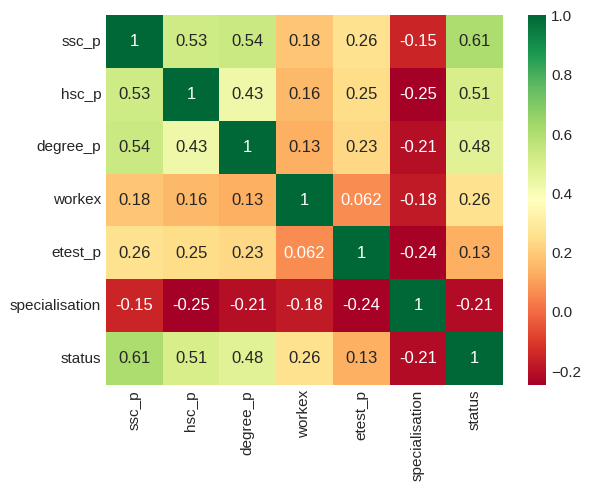

In [ ]:
def recruit_corr(data):
  correlation = data.corr()
  sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")
recruit_corr(data)

# Data Classification

In [ ]:
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
warnings.filterwarnings('ignore')

# Pembagian Dataset (Skenario Size 80:20)

In [ ]:
# Pembagian data menggunakan holdout method
xdata = data.drop('status', axis=1)
ydata = data.status # data target 'status'
x_train,x_test,y_train,y_test=train_test_split(xdata,ydata,test_size=0.2,random_state=1)

In [ ]:
# Memakai oversampling
from imblearn.over_sampling import RandomOverSampler
sm=RandomOverSampler()
x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train)

y_train_sm.value_counts()

1    113
0    113
Name: status, dtype: int64

In [ ]:
# KNN
Knn_sm=KNeighborsClassifier()
Knn_sm.fit(x_train_sm,y_train_sm)
y_pred_sm=Knn_sm.predict(x_test)
print(classification_report(y_test,y_pred_sm))

              precision    recall  f1-score   support

           0       0.58      0.92      0.71        12
           1       0.95      0.72      0.82        29

    accuracy                           0.78        41
   macro avg       0.77      0.82      0.77        41
weighted avg       0.84      0.78      0.79        41



In [ ]:
# SVM
sv_sm=SVC()
sv_sm.fit(x_train_sm,y_train_sm)
y_pred_sm1=sv_sm.predict(x_test)
print(classification_report(y_test,y_pred_sm1))

              precision    recall  f1-score   support

           0       0.73      0.92      0.81        12
           1       0.96      0.86      0.91        29

    accuracy                           0.88        41
   macro avg       0.85      0.89      0.86        41
weighted avg       0.89      0.88      0.88        41



In [ ]:
# Naive Bayes
nb_sm=GaussianNB()
nb_sm.fit(x_train_sm,y_train_sm)
y_pred_sm2=nb_sm.predict(x_test)
print(classification_report(y_test,y_pred_sm2))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.89      0.89      0.89        28

    accuracy                           0.86        43
   macro avg       0.85      0.85      0.85        43
weighted avg       0.86      0.86      0.86        43



In [ ]:
# Decision Tree
dt_sm=DecisionTreeClassifier(criterion='entropy')
dt_sm.fit(x_train_sm,y_train_sm)
y_pred_sm3=dt_sm.predict(x_test)
print(classification_report(y_test,y_pred_sm3))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57        12
           1       0.84      0.72      0.78        29

    accuracy                           0.71        41
   macro avg       0.67      0.70      0.67        41
weighted avg       0.74      0.71      0.72        41



In [ ]:
#  Random Forest
rf_sm=RandomForestClassifier(n_estimators=100,random_state=1)
rf_sm.fit(x_train_sm,y_train_sm)
y_pred_sm4=rf_sm.predict(x_test)
print(classification_report(y_test,y_pred_sm4))

              precision    recall  f1-score   support

           0       0.73      0.53      0.62        15
           1       0.78      0.89      0.83        28

    accuracy                           0.77        43
   macro avg       0.75      0.71      0.72        43
weighted avg       0.76      0.77      0.76        43



# Pembagian Dataset (Skenario Size 90:10)

In [ ]:
# Pembagian data menggunakan holdout method
xdata_1 = data.drop('status', axis=1)
ydata_1 = data.status # data target 'status'
x_train,x_test,y_train,y_test=train_test_split(xdata_1,ydata_1,test_size=0.1,random_state=1)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
sm=RandomOverSampler()
x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train)

y_train_sm.value_counts()

1    126
0    126
Name: status, dtype: int64

In [ ]:
# KNN_1
Knn_sm=KNeighborsClassifier()
Knn_sm.fit(x_train_sm,y_train_sm)
y_pred_sm=Knn_sm.predict(x_test)
print(classification_report(y_test,y_pred_sm))

              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.62      0.77        16

    accuracy                           0.71        21
   macro avg       0.73      0.81      0.70        21
weighted avg       0.87      0.71      0.73        21



In [ ]:
# SVM_1
sv_sm=SVC()
sv_sm.fit(x_train_sm,y_train_sm)
y_pred_sm1=sv_sm.predict(x_test)
print(classification_report(y_test,y_pred_sm1))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.88      0.93        16

    accuracy                           0.90        21
   macro avg       0.86      0.94      0.88        21
weighted avg       0.93      0.90      0.91        21



In [ ]:
# Naive Bayes_1
nb_sm=GaussianNB()
nb_sm.fit(x_train_sm,y_train_sm)
y_pred_sm2=nb_sm.predict(x_test)
print(classification_report(y_test,y_pred_sm2))

              precision    recall  f1-score   support

           0       0.56      0.83      0.67         6
           1       0.92      0.75      0.83        16

    accuracy                           0.77        22
   macro avg       0.74      0.79      0.75        22
weighted avg       0.82      0.77      0.78        22



In [ ]:
# Decison Tree_1
dt_sm=DecisionTreeClassifier(criterion='entropy')
dt_sm.fit(x_train_sm,y_train_sm)
y_pred_sm3=dt_sm.predict(x_test)
print(classification_report(y_test,y_pred_sm3))

              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      0.75      0.86        16

    accuracy                           0.81        21
   macro avg       0.78      0.88      0.79        21
weighted avg       0.89      0.81      0.82        21



In [ ]:
#  Random Forest_1
rf_sm=RandomForestClassifier(n_estimators=100,random_state=1)
rf_sm.fit(x_train_sm,y_train_sm)
y_pred_sm4=rf_sm.predict(x_test)
print(classification_report(y_test,y_pred_sm4))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.87      0.81      0.84        16

    accuracy                           0.77        22
   macro avg       0.72      0.74      0.73        22
weighted avg       0.79      0.77      0.78        22



# Pembagian Dataset (Skenario Size 70:30)

In [ ]:
# Pembagian data menggunakan holdout method
xdata_2 = data.drop('status', axis=1)
ydata_2 = data.status # data target 'status'
x_train,x_test,y_train,y_test=train_test_split(xdata_2,ydata_2,test_size=0.3,random_state=1)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
sm=RandomOverSampler()
x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train)

y_train_sm.value_counts()

1    96
0    96
Name: status, dtype: int64

In [ ]:
# KNN_2
Knn_sm=KNeighborsClassifier()
Knn_sm.fit(x_train_sm,y_train_sm)
y_pred_sm=Knn_sm.predict(x_test)
print(classification_report(y_test,y_pred_sm))

              precision    recall  f1-score   support

           0       0.62      0.94      0.75        16
           1       0.97      0.80      0.88        46

    accuracy                           0.84        62
   macro avg       0.80      0.87      0.82        62
weighted avg       0.88      0.84      0.85        62



In [ ]:
# SVM_2
sv_sm=SVC()
sv_sm.fit(x_train_sm,y_train_sm)
y_pred_sm1=sv_sm.predict(x_test)
print(classification_report(y_test,y_pred_sm1))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78        16
           1       0.95      0.87      0.91        46

    accuracy                           0.87        62
   macro avg       0.83      0.87      0.84        62
weighted avg       0.89      0.87      0.88        62



In [ ]:
# Naive Bayes_2
nb_sm=GaussianNB()
nb_sm.fit(x_train_sm,y_train_sm)
y_pred_sm2=nb_sm.predict(x_test)
print(classification_report(y_test,y_pred_sm2))

              precision    recall  f1-score   support

           0       0.59      0.85      0.69        20
           1       0.92      0.73      0.81        45

    accuracy                           0.77        65
   macro avg       0.75      0.79      0.75        65
weighted avg       0.81      0.77      0.78        65



In [ ]:
# Decison Tree_2
dt_sm=DecisionTreeClassifier(criterion='entropy')
dt_sm.fit(x_train_sm,y_train_sm)
y_pred_sm3=dt_sm.predict(x_test)
print(classification_report(y_test,y_pred_sm3))

              precision    recall  f1-score   support

           0       0.60      0.94      0.73        16
           1       0.97      0.78      0.87        46

    accuracy                           0.82        62
   macro avg       0.79      0.86      0.80        62
weighted avg       0.88      0.82      0.83        62



In [ ]:
#  Random Forest_
rf_sm=RandomForestClassifier(n_estimators=100,random_state=1)
rf_sm.fit(x_train_sm,y_train_sm)
y_pred_sm4=rf_sm.predict(x_test)
print(classification_report(y_test,y_pred_sm4))

              precision    recall  f1-score   support

           0       0.72      0.65      0.68        20
           1       0.85      0.89      0.87        45

    accuracy                           0.82        65
   macro avg       0.79      0.77      0.78        65
weighted avg       0.81      0.82      0.81        65



# Sekian Terimakasih